## Lab 2-2. Linear Regression (Chapter 3) - scikit-learn version

To run in Colab,
* click this button
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/machine_learning_islp/blob/main/ch03_linear_regression_scikit-learn.ipynb)
* run the following cell

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
# print(IN_COLAB)

if IN_COLAB:
    !git clone https://github.com/ssuai/ISLP.git
    #!pip install ISLP # This takes too much time

### 3.6.1 Import *scikit learn* and other packages

This time, we will use *scikit-learn* package.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# import LinearRregression here!
from sklearn.linear_model import LinearRegression

In [3]:
# a function for residual plot!
# use sns.regplot for fancier plot
def plot_residue(pred, resid):
    """
    inputs: 
        pred - predicted values
        resid - residuals
    """
    
    import seaborn as sns

    res=sns.regplot(x=pred, y=resid, lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
    XLIM=res.axes.xaxis.get_data_interval()
    #res.axes.hlines(0,XLIM[0], XLIM[1], linestyles='dotted')
    plt.hlines(0,XLIM[0], XLIM[1], linestyles='dotted')
    plt.xlabel('fitted values')
    plt.ylabel('residuals')
    plt.title('Residuals vs. fitted')

#### The Boston data set

*Housing Values in Suburbs of Boston*

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

* crim: per capita crime rate by town.

* zn: proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: nitrogen oxides concentration (parts per 10 million).

* rm: average number of rooms per dwelling.

* age: proportion of owner-occupied units built prior to 1940.

* dis: weighted mean of distances to five Boston employment centres.

* rad: index of accessibility to radial highways.

* tax: full-value property-tax rate per \$10,000.

* ptratio: pupil-teacher ratio by town.

* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat: lower status of the population (percent).

* medv: median value of owner-occupied homes in \$1000s.

Source
* Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

* Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [4]:
# load data
Boston = pd.read_csv("ISLP/data/Boston.csv")   # it's saved under data folder
print(Boston.shape)  # 506 rows and 14 columns
Boston.head()

(506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
# get names of columns
Boston.columns    # names(Boston) in R

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [6]:
# descriptions of each column
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 3.6.2 Simple Linear Regression

Let's use Ordinary Least Squares in scikit-learn package.
You can find more information [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [7]:
X = Boston[["lstat"]]
y = Boston[["medv"]]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([34.55384088]), array([[-0.95004935]]))

**Unfortunately, `LinearRegression` in *scikit-learn* does NOT provide the p-value. So, you'd better explore your data with *statsmodels* BEFORE using *scikit-learn*.**

See [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to see what you can do with `LinearRegression`.

In [8]:
# R2 score
lin_reg.score(X,y)

0.5441462975864799

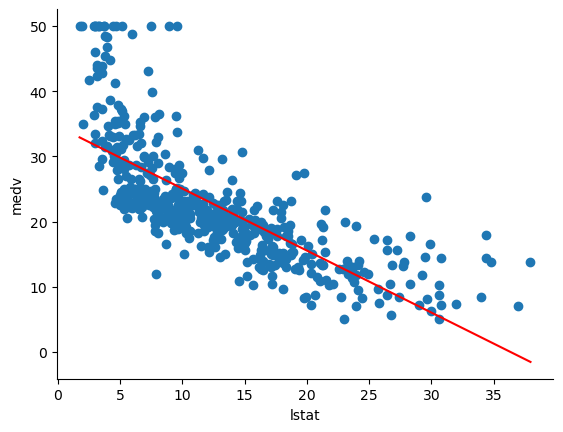

In [9]:

# scatter plot of the data
plt.scatter(Boston.lstat, Boston.medv)  

# plot estimated linear model
Xnew = pd.DataFrame({'lstat':[Boston.lstat.min(), Boston.lstat.max()]})
Y_pred = lin_reg.predict(Xnew)  # predict
plt.plot(Xnew, Y_pred, c='red')
plt.xlabel("lstat")
plt.ylabel("medv")
sns.despine()

### 3.6.3 Multiple Linear Regression

In [10]:
# add age to predictor!
X = Boston[["lstat","age"]]
y = Boston["medv"]
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(33.2227605317929, array([-1.03206856,  0.03454434]))

In [11]:
# R2 score
lin_reg.score(X,y)  # R2 slightly increases

0.5512689379421003

### 3.6.4 Interaction Terms

In [12]:
# Method 1. add the iteraction term by hand
X = Boston[["lstat","age"]].copy()
X['lstat:age'] = X.apply(lambda row : row['lstat']*row['age'], axis = 1)
# X['lstat:age'] = X["lstat"]*X["age"]

In [13]:
y = Boston["medv"]
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(36.088535934612906,
 array([-1.39211684e+00, -7.20859509e-04,  4.15595185e-03]))

In [14]:
# Method 2. Use PolynomialFeatures in sklearn.preprocessing
X = Boston[["lstat","age"]]

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)   # generate interaction term
X = poly.fit_transform(X)      # actual transform
print(X)

y = Boston[["medv"]]
lin_reg = LinearRegression(fit_intercept=False)  # Ones are already included in X. So, do not include intercept!!!
lin_reg.fit(X, y)
lin_reg.coef_

[[  1.      4.98   65.2   324.696]
 [  1.      9.14   78.9   721.146]
 [  1.      4.03   61.1   246.233]
 ...
 [  1.      5.64   91.    513.24 ]
 [  1.      6.48   89.3   578.664]
 [  1.      7.88   80.8   636.704]]


array([[ 3.60885359e+01, -1.39211684e+00, -7.20859509e-04,
         4.15595185e-03]])

In [15]:
Boston[['lstat','age']].head()

,lstat,age
0,4.98,65.2
1,9.14,78.9
2,4.03,61.1
3,2.94,45.8
4,5.33,54.2


### 3.6.5 Non-linear Transformation of the Predictors

In [16]:
# Use PolynomialFeatures in sklearn.preprocessing
X = Boston[["lstat"]]

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)   # 2nd order
X = poly.fit_transform(X)      # actual transform
print(X)

y = Boston[["medv"]]
lin_reg = LinearRegression(fit_intercept=False)  # Ones are already included in X. So, do not include intercept!!!
lin_reg.fit(X, y)
lin_reg.coef_

[[ 1.      4.98   24.8004]
 [ 1.      9.14   83.5396]
 [ 1.      4.03   16.2409]
 ...
 [ 1.      5.64   31.8096]
 [ 1.      6.48   41.9904]
 [ 1.      7.88   62.0944]]


array([[42.86200733, -2.3328211 ,  0.04354689]])

In [17]:
# Use PolynomialFeatures in sklearn.preprocessing
X = Boston[["lstat"]]

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)   # up to 5th order!
X = poly.fit_transform(X)      # actual transform
print(X)

y = Boston["medv"]
lin_reg = LinearRegression(fit_intercept=False)  # Ones are already included in X. So, do not include intercept!!!
lin_reg.fit(X, y)
lin_reg.coef_

[[1.00000000e+00 4.98000000e+00 2.48004000e+01 1.23505992e+02
  6.15059840e+02 3.06299800e+03]
 [1.00000000e+00 9.14000000e+00 8.35396000e+01 7.63551944e+02
  6.97886477e+03 6.37868240e+04]
 [1.00000000e+00 4.03000000e+00 1.62409000e+01 6.54508270e+01
  2.63766833e+02 1.06298034e+03]
 ...
 [1.00000000e+00 5.64000000e+00 3.18096000e+01 1.79406144e+02
  1.01185065e+03 5.70683768e+03]
 [1.00000000e+00 6.48000000e+00 4.19904000e+01 2.72097792e+02
  1.76319369e+03 1.14254951e+04]
 [1.00000000e+00 7.88000000e+00 6.20944000e+01 4.89303872e+02
  3.85571451e+03 3.03830303e+04]]


array([ 6.76996768e+01, -1.19911168e+01,  1.27281826e+00, -6.82738394e-02,
        1.72606824e-03, -1.63199416e-05])

In [18]:
# Log(X)
X = np.log(Boston[["rm"]])
y = Boston["medv"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-76.487817481876, array([54.05456973]))